In [40]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data

df = pd.read_csv(r'C:\Users\julie\Downloads\movies.csv')

In [2]:
# Let's look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [7]:
# let's see if there's any missing data. Create  for loop.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))



budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [8]:
# Data types for our columns

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [11]:
# Change data type in budget and gross columns - From int64 to float64
df['budget'] = df['budget'].astype('float64')
df['gross'] = df['gross'].astype('float64')

In [12]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [23]:
# Now putting data type back to integer from float

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [14]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


<AxesSubplot:>

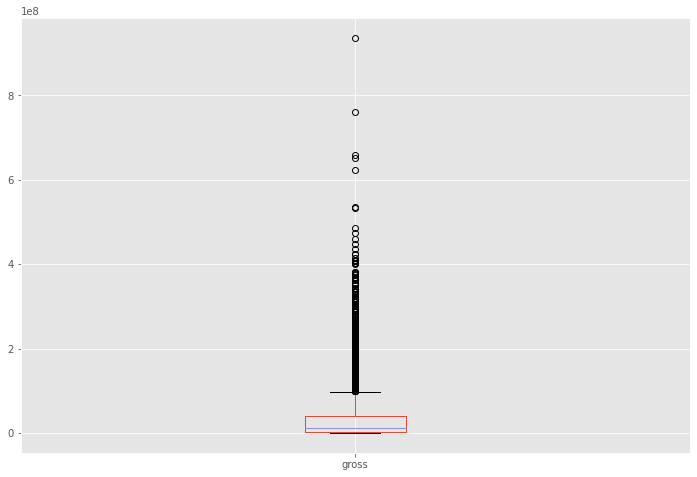

In [54]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [ ]:
# Create correct year-  'year' and 'rleased' columns don't always match. Will take first four values from 'Released' column and create a new column.
# Released is a object. Will change from object to a string.

df['yearcorrect'] = df['released'].astype(str).str[:4]

df(head)

In [43]:
df= df.sort_values(by=['gross'], inplace=False, ascending=False)

In [24]:
#To show all the data
pd.set_option('display.max_rows', None)

In [33]:
# Look to see if there are any duplicates. Drop any duplicates
# .df.drop_duplicates()
# To look at all the companies:

df['company'].drop_duplicates().sort_values(ascending=False).head()

5288                    micro_scope
3486                       i5 Films
6084                           erbp
3225                 double A Films
2707    Zucker Brothers Productions
Name: company, dtype: object

In [ ]:
df(head)

In [ ]:
# Budget high correlation gross
# Company will have a high correlation with gross

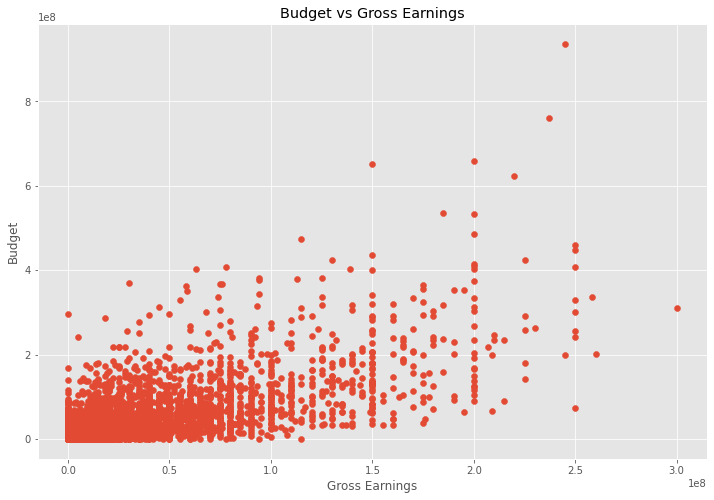

In [7]:
# Scatterplot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget')
plt.show()


In [ ]:
df(head)

<AxesSubplot:xlabel='budget', ylabel='gross'>

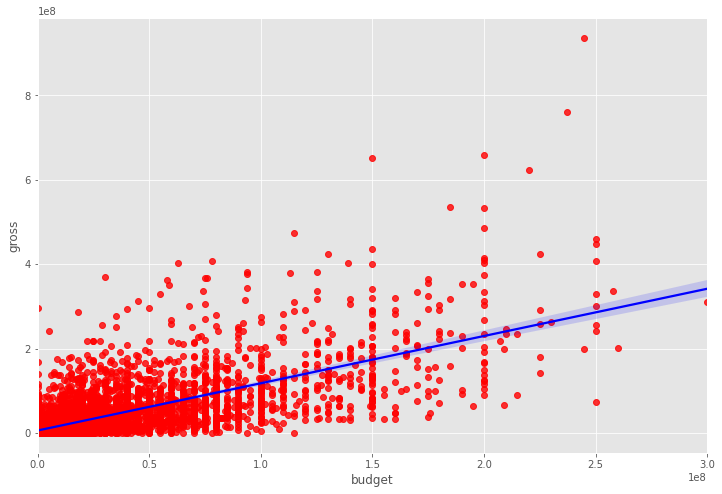

In [13]:
# Regplot with Seaborn - plot budget vs. gross
# Regression plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [17]:
# Checking Correlation Values
# Pearson is dafault df.corr() (Shown below)
# Kendall is df.corr(method='kendall') 
# Spearman is df.corr(method='spearman') 

df.corr() 

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


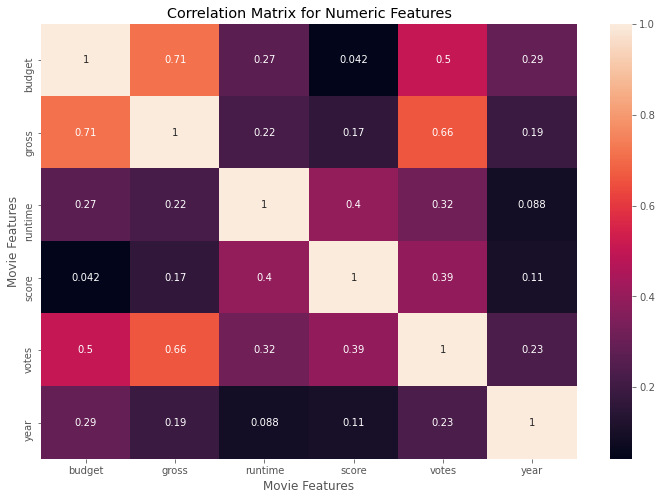

In [21]:
# High correlation between budget and gross
# Making a Correlation Matrix
# Seaborn sns Heatmap

correlation_matrix = df.corr() 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [55]:

# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.095504,-0.028062,0.080628,0.119652,0.115788,0.117957,0.101400,0.059645,0.040488,0.004604,0.077698,0.119393,0.075271,-0.002140,-0.014699
company,0.095504,1.000000,0.344712,0.647567,0.070490,0.714419,0.702854,0.377810,0.313695,0.007934,-0.036872,0.580693,0.691879,0.645280,0.033326,0.050131
country,-0.028062,0.344712,1.000000,0.277133,-0.024093,0.279401,0.275837,0.241951,0.107884,0.028241,-0.164288,0.288864,0.266566,0.287553,-0.052244,-0.037429
director,0.080628,0.647567,0.277133,1.000000,0.072156,0.756448,0.743649,0.334472,0.376711,0.015257,0.050784,0.593229,0.743359,0.724076,0.094323,0.111676
genre,0.119652,0.070490,-0.024093,0.072156,1.000000,0.101394,0.102866,0.097025,0.073920,-0.003693,0.027134,0.083625,0.102707,0.072177,0.040547,0.033800
gross,0.115788,0.714419,0.279401,0.756448,0.101394,1.000000,0.985850,0.411240,0.476354,0.014827,0.037916,0.657912,0.981340,0.817174,0.113675,0.125994
name,0.117957,0.702854,0.275837,0.743649,0.102866,0.985850,1.000000,0.405936,0.470290,0.015281,0.038703,0.648663,0.968189,0.808108,0.108869,0.120307
rating,0.101400,0.377810,0.241951,0.334472,0.097025,0.411240,0.405936,1.000000,0.200424,0.047989,-0.121917,0.361834,0.399032,0.358276,0.025147,0.027148
released,0.059645,0.313695,0.107884,0.376711,0.073920,0.476354,0.470290,0.200424,1.000000,0.004341,0.078252,0.346635,0.472551,0.404891,0.242076,0.282656
runtime,0.040488,0.007934,0.028241,0.015257,-0.003693,0.014827,0.015281,0.047989,0.004341,1.000000,-0.022387,0.027886,0.014370,0.000426,0.000274,0.001714


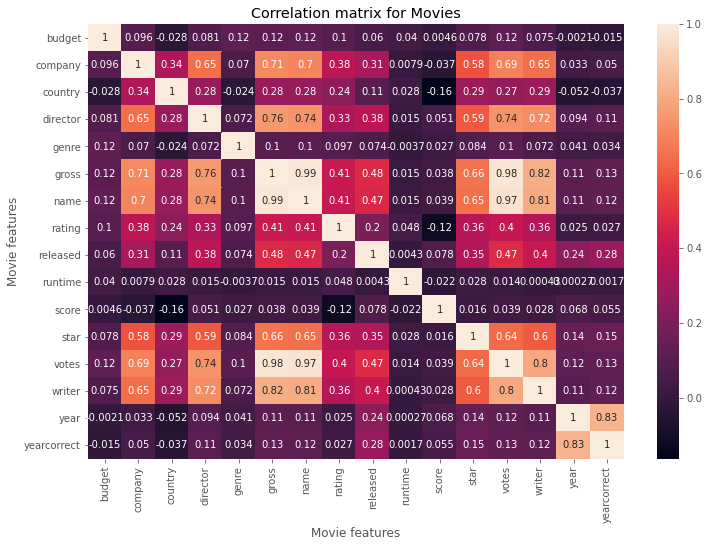

In [56]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [57]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget       budget         1.000000
             company        0.095504
             country       -0.028062
             director       0.080628
             genre          0.119652
                              ...   
yearcorrect  star           0.150918
             votes          0.130588
             writer         0.118773
             year           0.830337
             yearcorrect    1.000000
Length: 256, dtype: float64


In [58]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score        country       -0.164288
country      score         -0.164288
rating       score         -0.121917
score        rating        -0.121917
country      year          -0.052244
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [53]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         company        0.580693
company      star           0.580693
star         director       0.593229
director     star           0.593229
writer       star           0.598075
star         writer         0.598075
votes        star           0.639584
star         votes          0.639584
writer       company        0.645280
company      writer         0.645280
             director       0.647567
director     company        0.647567
name         star           0.648663
star         name           0.648663
             gross          0.657912
gross        star           0.657912
votes        company        0.691879
company      votes          0.691879
name         company        0.702854
company      name           0.702854
gross        company        0.714419
company      gross          0.714419
writer       director       0.724076
director     writer         0.724076
votes        director       0.743359
director     votes          0.743359
name         director       0.743649
d

In [59]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2123    21322318408
2085    19430051320
1680    17115702495
2062    14788570587
2122    10455507123
664      8824216545
1582     8540112287
665      7720114061
2041     6688156475
821      5458121021
822      4143974397
1515     3384812932
1720     3242024778
1011     3113861473
2050     2967117827
Name: gross, dtype: int64

In [ ]:
sns.swarmplot(x="rating", y="gross", data=df)

In [ ]:
sns.stripplot(x="rating", y="gross", data=df)